### Introduction

Cervical Cancer accounts for 4th highest cause of mortality in women worldwide
Its prevalence is highly skewed towards developing countries due to lack of vaccination and early screening

### Problem statement
To develop a algorithm such that we can predict through classification the occurence of cervical cancer based on risk factors.  This would allow us to identify high risk population segment for selected screening


In [44]:
#import libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import preprocessing

from sklearn.model_selection import KFold

import seaborn as sns; sns.set()
import scikitplot as skplt

In [45]:
df = pd.read_csv(r"risk_factors_cervical_cancer.csv", na_values="?")

### Exploratory Data Analysis

In [46]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df.shape

(858, 36)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

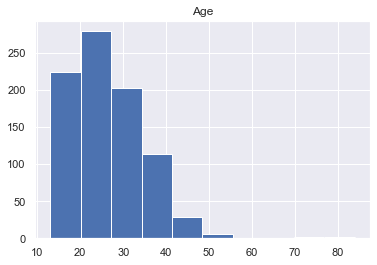

In [49]:
df.hist("Age")

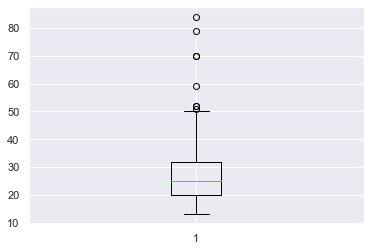

In [7]:
plt.boxplot(df["Age"])
plt.show()

array([[<AxesSubplot:title={'center':'Biopsy'}>]], dtype=object)

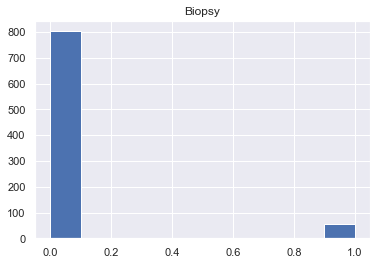

In [8]:
df.hist("Biopsy")

In [9]:
df.groupby(["Biopsy"]).size()

Biopsy
0    803
1     55
dtype: int64

In the dataset, 848 observations, 803 are negative, and 55 positive of cervical cancer. There is a need to do oversampling/undersampling through SMOTE technique

array([[<AxesSubplot:title={'center':'Number of sexual partners'}>]],
      dtype=object)

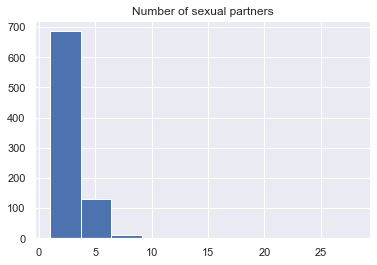

In [10]:
df.hist("Number of sexual partners")

In [11]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [12]:
mis_val = df.isnull().sum()
mis_val_percent = (100 * df.isnull().sum() / len(df)).round(1)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing', 1 : 'Proportion in %'})

mis_val_table

,Missing,Proportion in %
Age,0,0.0
Number of sexual partners,26,3.0
First sexual intercourse,7,0.8
Num of pregnancies,56,6.5
Smokes,13,1.5
Smokes (years),13,1.5
Smokes (packs/year),13,1.5
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
IUD,117,13.6


In [13]:
df["STDs: Number of diagnosis"].sum()

75

The sum in the number of diagnosis in STD is only 75, with mostly zero data.  
As a set, STDs number, time since last diagnosis and time since first diagnosis are dropped.

In [14]:
df["Number of sexual partners"].median()

2.0

In [50]:
df["Number of sexual partners"].fillna(df["Number of sexual partners"].median(), inplace=True)
df["First sexual intercourse"].fillna(df["First sexual intercourse"].median(), inplace=True)
df["Num of pregnancies"].fillna(df["Num of pregnancies"].median(), inplace=True)

array([[<AxesSubplot:title={'center':'Smokes (years)'}>]], dtype=object)

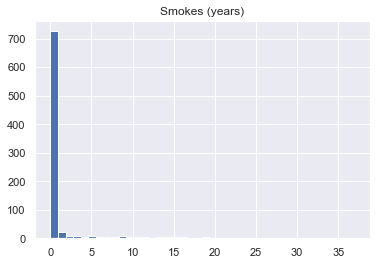

In [34]:
df.hist("Smokes (years)",bins=40)

array([[<AxesSubplot:title={'center':'Smokes (packs/year)'}>]],
      dtype=object)

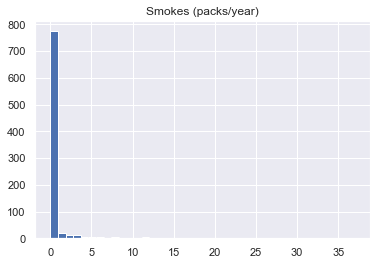

In [35]:
df.hist("Smokes (packs/year)",bins=40)

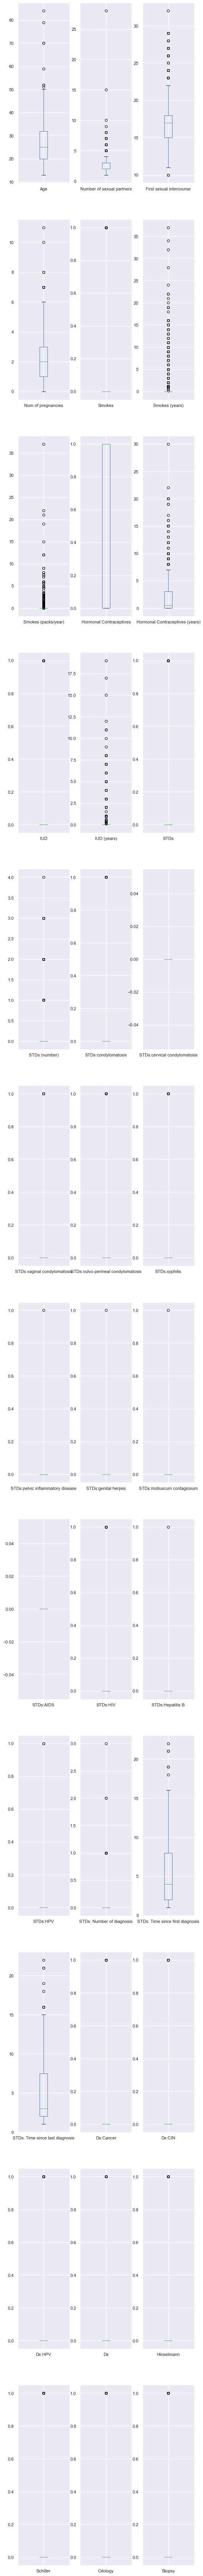

In [36]:
df.plot(kind="box",  subplots=True, layout=(20,3),sharex=False, sharey=False, figsize=(8, 200))
plt.show()

array([[<AxesSubplot:title={'center':'STDs:Hepatitis B'}>]], dtype=object)

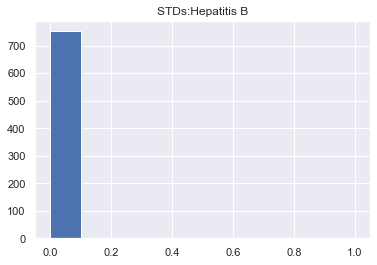

In [7]:
df.hist("STDs:Hepatitis B")

In [37]:
df["STDs (number)"].sum()

133.0

In [51]:
# cleaning numerical columns with median
cleanlist =[1,2,3,5,6,8,10,12]
for i in cleanlist:
    df.iloc[:,i].fillna(df.iloc[:,i].median(),inplace=True)

In [52]:
# cleaning STD Boolean columns with True (1)

cleanlist = np.arange(11,25)
for i in cleanlist:
    df.iloc[:,i].fillna(1,inplace=True)

array([[<AxesSubplot:title={'center':'Smokes'}>]], dtype=object)

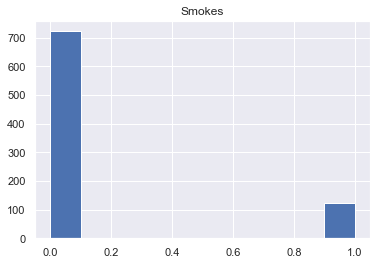

In [40]:
df.hist("Smokes")

array([[<AxesSubplot:title={'center':'IUD'}>]], dtype=object)

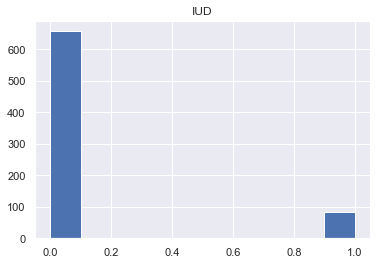

In [41]:
df.hist("IUD")

array([[<AxesSubplot:title={'center':'Hormonal Contraceptives'}>]],
      dtype=object)

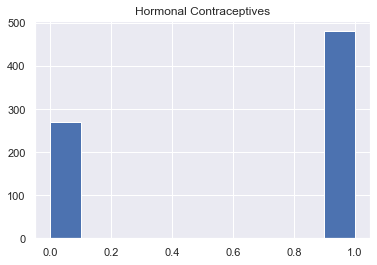

In [42]:
df.hist("Hormonal Contraceptives")

In [53]:
# Dealing with remaining Smokes, Hormonal Contraceptives, IUD replacing with mode

df["Smokes"].fillna(0,inplace=True)
df["Hormonal Contraceptives"].fillna(1,inplace=True)
df["IUD"].fillna(0,inplace=True)


In [54]:
# Drop columns on STD Number of Diagnosis, time since last, first diagnosis

df=df.drop(['STDs: Number of diagnosis', 'STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)

In [55]:
X=df.iloc[:,0:28]
y=df.iloc[:,32]

In [56]:
X.shape

(858, 28)

In [57]:
y.shape

(858,)

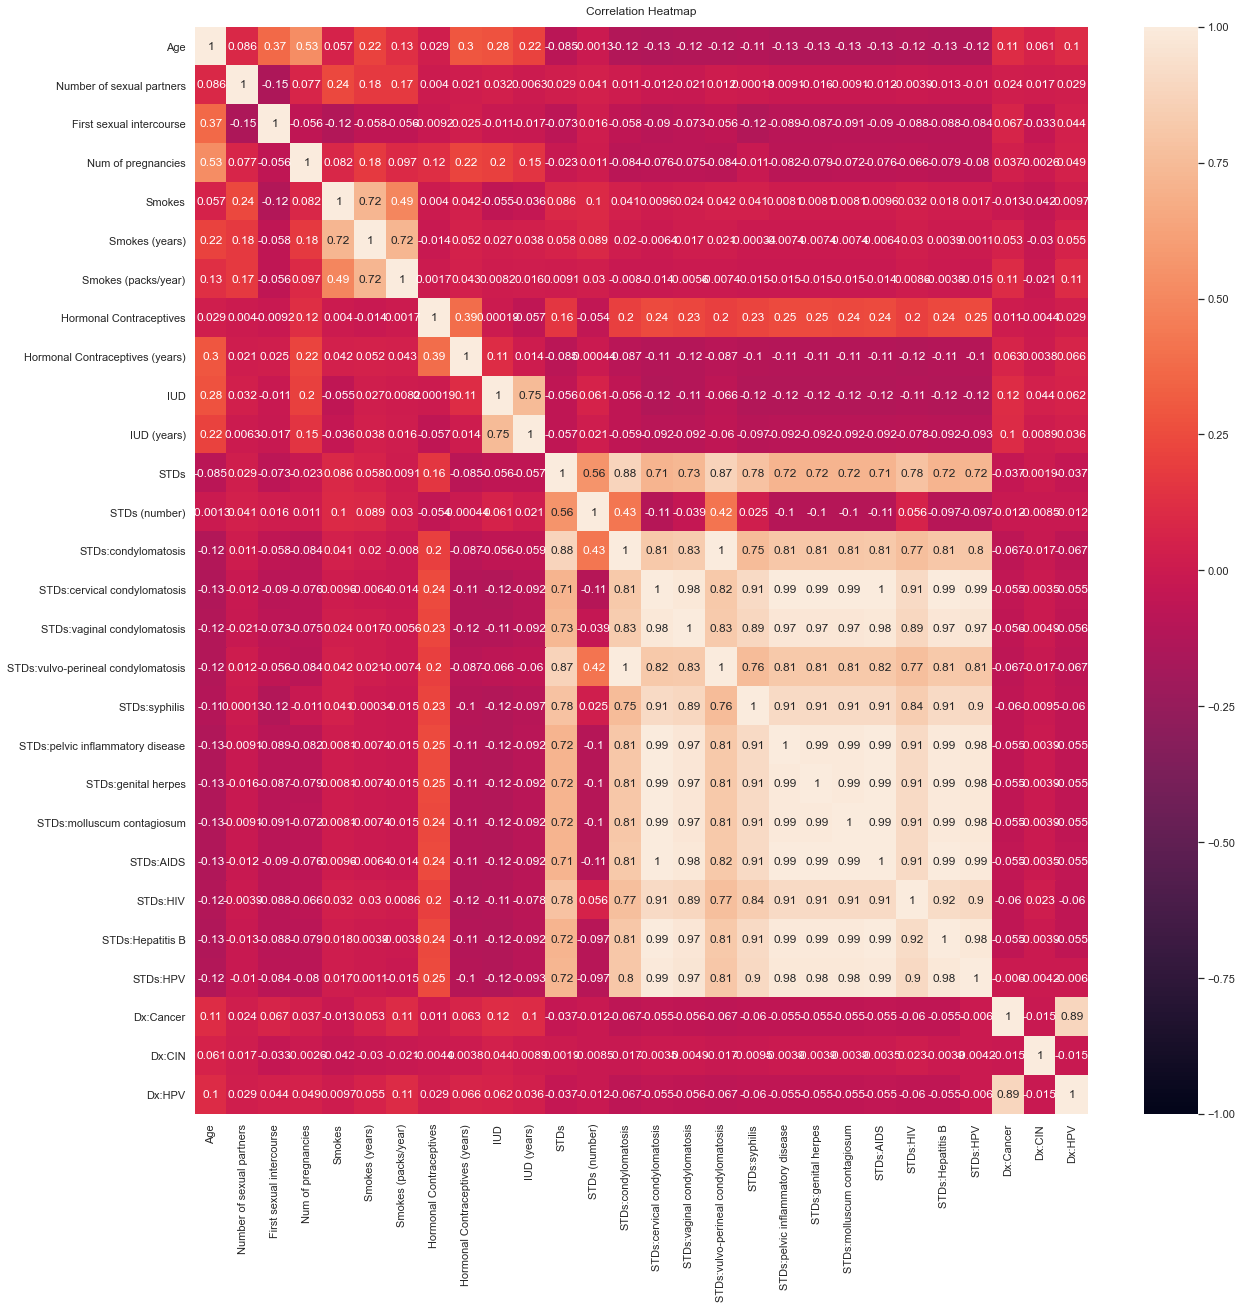

In [36]:
# Correlation Heat Map

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [58]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

C:\Users\chung\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,24.0,Age
1,3.4,Number of sexual partners
2,18.0,First sexual intercourse
3,5.6,Num of pregnancies
4,2.6,Smokes
5,4.0,Smokes (years)
6,2.3,Smokes (packs/year)
7,4.3,Hormonal Contraceptives
8,1.8,Hormonal Contraceptives (years)
9,2.8,IUD


In [59]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Text(0, 0.5, 'cumulative explained variance')

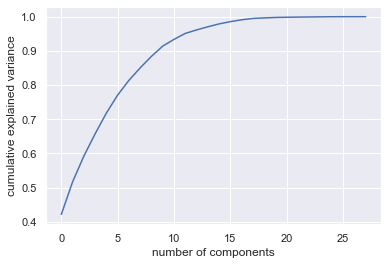

In [60]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [61]:
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (858, 28)
transformed shape: (858, 10)


In [62]:
# Looking at the PCA components

for i in range(10):
    print("PCA Component",i,"Min:",round(X_pca[:,i].min(),2), "Max:",round(X_pca[:,i].max(),2))

PCA Component 0 Min: -2.06 Max: 9.21
PCA Component 1 Min: -1.99 Max: 16.48
PCA Component 2 Min: -5.29 Max: 7.45
PCA Component 3 Min: -6.03 Max: 8.65
PCA Component 4 Min: -3.42 Max: 6.51
PCA Component 5 Min: -4.58 Max: 5.96
PCA Component 6 Min: -4.94 Max: 5.13
PCA Component 7 Min: -1.99 Max: 9.0
PCA Component 8 Min: -5.77 Max: 7.82
PCA Component 9 Min: -3.47 Max: 9.56


In [ ]:
! pip install -U imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_pca, y = oversample.fit_resample(X_pca, y)

In [64]:
# Split-out validation dataset

validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y,
test_size =validation_size, random_state=seed)

In [65]:
# Test options and evaluation  metric
seed = 7
scoring = 'accuracy'

In [66]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.654148 (0.055353)
LDA: 0.652574 (0.059573)
KNN: 0.854367 (0.025114)
CART: 0.840377 (0.031330)
NB: 0.644852 (0.043356)
SVM: 0.827114 (0.020701)


KNN, CART and SVM perform best in the group of algorithms

In [67]:
# Make predictions on validation dataset
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
predictions = KN.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.8322981366459627

Confusion matrix:
[[126  43]
 [ 11 142]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       169
           1       0.77      0.93      0.84       153

    accuracy                           0.83       322
   macro avg       0.84      0.84      0.83       322
weighted avg       0.85      0.83      0.83       322



In [68]:
# Make predictions on validation dataset
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictions = CART.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.8757763975155279

Confusion matrix:
[[151  18]
 [ 22 131]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       169
           1       0.88      0.86      0.87       153

    accuracy                           0.88       322
   macro avg       0.88      0.87      0.88       322
weighted avg       0.88      0.88      0.88       322



In [69]:
# Make predictions on validation dataset
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.84472049689441

Confusion matrix:
[[129  40]
 [ 10 143]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       169
           1       0.78      0.93      0.85       153

    accuracy                           0.84       322
   macro avg       0.85      0.85      0.84       322
weighted avg       0.86      0.84      0.84       322



### Try ensemble or gradient boosting to raise performance

In [70]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
# RandomForestClassifier(n_estimators=100)
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=1)

In [71]:
predictions = model.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.922360248447205

Confusion matrix:
[[151  18]
 [  7 146]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       169
           1       0.89      0.95      0.92       153

    accuracy                           0.92       322
   macro avg       0.92      0.92      0.92       322
weighted avg       0.92      0.92      0.92       322



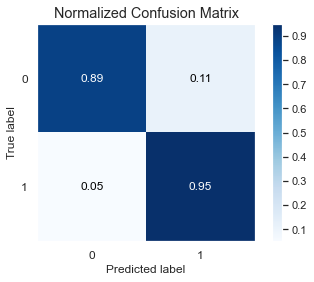

In [72]:
#skplt.metrics.plot_confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
model = GradientBoostingClassifier(learning_rate=0.1, 
                                              n_estimators=120,
                                              max_depth=10)

model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=120)

In [75]:
predictions = model.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.9192546583850931

Confusion matrix:
[[152  17]
 [  9 144]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       169
           1       0.89      0.94      0.92       153

    accuracy                           0.92       322
   macro avg       0.92      0.92      0.92       322
weighted avg       0.92      0.92      0.92       322



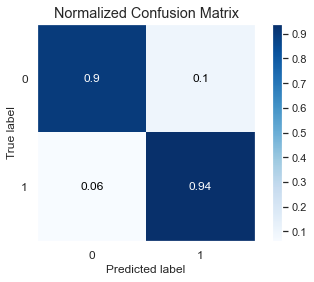

In [76]:
#skplt.metrics.plot_confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()